In [44]:
%matplotlib inline
import pandas as pd
import numpy as np
import json

In [54]:
def json_url(username, index):
    pattern = 'https://analytics.twitter.com/user/{username}/home/summary.json?start_time={start}&end_time={end}'
    (start, end) = index[[0, -1]].astype(np.int64) / (10 ** 6)
    
    return pattern.format(username=username, start=start, end=end)

index = pd.date_range(end='today', periods=365*2)
json_url('resiak', index)
# fetch this by hand

'https://analytics.twitter.com/user/resiak/home/summary.json?start_time=1374739359100&end_time=1437724959100'

In [100]:
def load(json_path):
    with open(json_path, 'r') as f:
        data = json.load(f)
        
    df = pd.DataFrame({
        k: load_timeseries(k, v)
        for k, v in data['timeseries'].iteritems()
        if v
    })
    df.index = (df.index / 1000).astype('datetime64[s]')
    return df

def load_timeseries(title, timeseries):
    df = pd.DataFrame(timeseries)
    df.columns = ['date', title]
    return df.set_index('date')[title]

In [101]:
resiak = load('./resiak_2013-07-24_2015-07-24.json')
fewerror = load('./fewerror_2013-07-24_2015-07-24.json')

In [102]:
p = pd.Panel({'resiak': resiak, 'fewerror': fewerror}).resample('1d', axis=1)

In [108]:
def plot_(start='2014-11', field='followers'):
    ax = p.minor_xs(field)[start:].plot()
    ax.figure.set_size_inches(12, 8)
    ax.figure.set_facecolor('white')

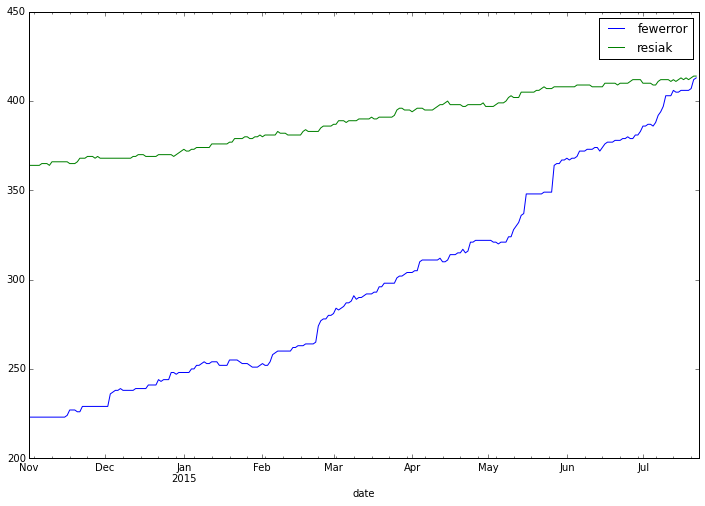

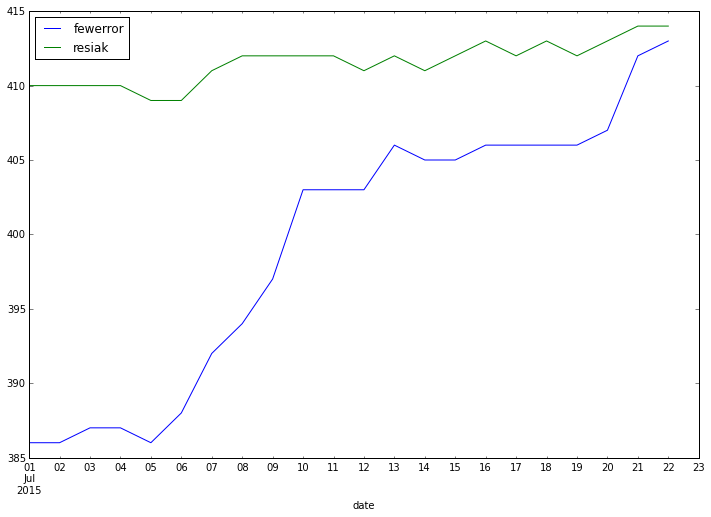

In [110]:
plot_()
plot_(start='2015-07')